In [1]:
from src.utils_data import *
import matplotlib.pyplot as plt
import numpy as np
from src.utils_result import *

## Comparison bool vs base model on two datasets

In [26]:
losses = get_loss_predictions2("predictions/")

In [28]:
losses

{'base_1279.csv': 3.3781664709693757,
 'base_200.csv': 4.867127501953704,
 'pool_1279.csv': 2.7075806992960736,
 'pool_200.csv': 4.218169148586952}

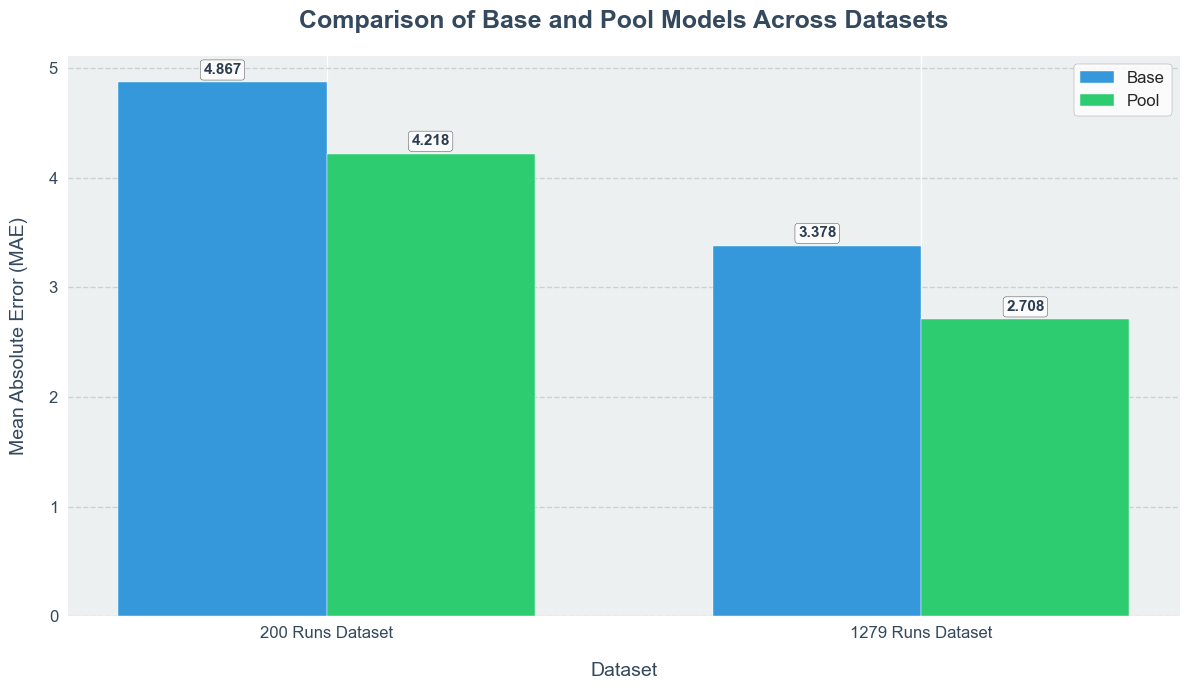

In [38]:
import matplotlib.pyplot as plt
import numpy as np


# Prepare data for grouped bar plot
groups = [
    ('base_200.csv', 'pool_200.csv'),
    ('base_1279.csv', 'pool_1279.csv')
]

# Set modern style
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 7), facecolor='white')

# Set width of bars
bar_width = 0.35

# Set positions of bars on X axis
r1 = np.arange(len(groups))
r2 = [x + bar_width for x in r1]

# Create grouped bar plot with custom colors
plt.bar(r1, [losses[groups[0][0]], losses[groups[1][0]]], 
        color='#3498db', width=bar_width, edgecolor='white', 
        label='Base', zorder=3)
plt.bar(r2, [losses[groups[0][1]], losses[groups[1][1]]], 
        color='#2ecc71', width=bar_width, edgecolor='white', 
        label='Pool', zorder=3)

# Add value labels on top of each bar with styling
for i, group in enumerate(groups):
    # Base bar
    plt.text(r1[i], losses[group[0]] + 0.05, f'{losses[group[0]]:.3f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold', 
             color='#2c3e50', 
             bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8))
    # Pool bar
    plt.text(r2[i], losses[group[1]] + 0.05, f'{losses[group[1]]:.3f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold', 
             color='#2c3e50', 
             bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8))

# Customize the plot
plt.xlabel('Dataset', fontsize=14, labelpad=15, color='#34495e')
plt.ylabel('Mean Absolute Error (MAE)', fontsize=14, labelpad=15, color='#34495e')
plt.title('Comparison of Base and Pool Models Across Datasets', 
          fontsize=18, pad=20, fontweight='bold', color='#34495e')

# Customize x-ticks
plt.xticks([r + bar_width/2 for r in range(len(groups))], 
          ['200 Runs Dataset', '1279 Runs Dataset'], 
          fontsize=12, color='#34495e')

# Customize y-ticks
plt.yticks(fontsize=12, color='#34495e')

# Add a legend
plt.legend(fontsize=12, loc='upper right', 
          frameon=True, facecolor='white', edgecolor='gray')

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.4, color='#95a5a6', zorder=0)

# Adjust background and layout
plt.gca().set_facecolor('#ecf0f1')
plt.tight_layout()

# Save the plot with high quality
plt.savefig('base_vs_pool_comparison.png', 
            dpi=300, 
            bbox_inches='tight', 
            facecolor='white', 
            edgecolor='none')

# Display the plot
plt.show()

# Looking at the effect of data

In [9]:
files = get_predictions_from_logs("lightning_logs","pool_2.5M")

In [11]:
losses = get_loss_predictions(files)

In [13]:
losses

{'lightning_logs\\CONFIG=pool_2.5M_1151,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=1024,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9\\version_0\\predictions\\predict_loss=0.1193.csv': 2.723341300106121,
 'lightning_logs\\CONFIG=pool_2.5M_1279,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=1024,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9\\version_0\\predictions\\predict_loss=0.1189.csv': 2.7075806992960736,
 'lightning_logs\\CONFIG=pool_2.5M_128,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=1024,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9\\version_0\\predictions\\predict_loss=0.2134.csv': 6.11208020444867,
 'lightning_logs\\CONFIG=pool_2.5M_384,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=1024,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9\\version_0\\predictions\\predict

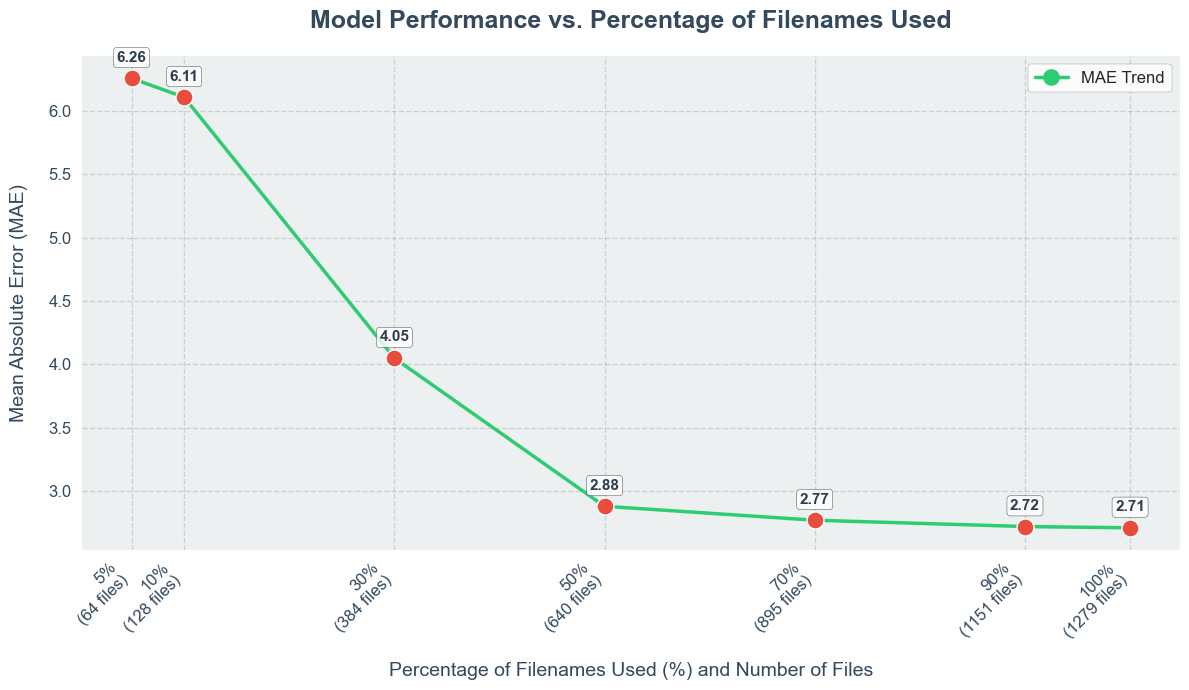

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Manually defined data percentages corresponding to the losses
data_percentages = {
    '5%': 6.26, 
    '10%': 6.11, 
    '30%': 4.05, 
    '50%': 2.88,
    '70%': 2.77,
    '90%': 2.72,
    '100%': 2.71
}

# Total number of filenames corresponding to 100%
total_filenames = 1279

# Convert the keys to numeric values for plotting
x_values = [float(k.strip('%')) for k in data_percentages.keys()]
y_values = list(data_percentages.values())
filenames = [64, 128, 384, 640, 895, 1151, 1279]

# Sort the data by x values
sorted_indices = np.argsort(x_values)
x_values = [x_values[i] for i in sorted_indices]
y_values = [y_values[i] for i in sorted_indices]
filenames = [filenames[i] for i in sorted_indices]

# Create the plot with a modern style
plt.style.use('seaborn-v0_8')  # Updated style for better aesthetics
plt.figure(figsize=(12, 7), facecolor='white')

# Plot the line and points with a professional color scheme
plt.plot(x_values, y_values, marker='o', linestyle='-', 
         linewidth=2.5, markersize=12, color='#2ecc71', 
         label='MAE Trend')
plt.scatter(x_values, y_values, s=150, c='#e74c3c', zorder=5, 
           edgecolors='white', linewidth=1)

# Customize title and labels with better fonts
plt.title('Model Performance vs. Percentage of Filenames Used', 
          fontsize=18, pad=20, fontweight='bold', color='#34495e')
plt.xlabel('Percentage of Filenames Used (%) and Number of Files', 
           fontsize=14, labelpad=15, color='#34495e')
plt.ylabel('Mean Absolute Error (MAE)', 
           fontsize=14, labelpad=15, color='#34495e')

# Customize grid
plt.grid(True, linestyle='--', alpha=0.4, color='#95a5a6')

# Add text annotations with better styling
for i, (x, y) in enumerate(zip(x_values, y_values)):
    plt.annotate(f'{y:.2f}', (x, y), 
                 textcoords="offset points", 
                 xytext=(0, 12), 
                 ha='center', 
                 fontsize=11, 
                 fontweight='bold',
                 color='#2c3e50',
                 bbox=dict(boxstyle='round,pad=0.2', 
                          fc='white', 
                          alpha=0.8))

# Customize x-axis ticks
xticks_labels = [f'{int(x)}%\n({int(filenames[i])} files)' 
                for i, x in enumerate(x_values)]
plt.xticks(x_values, xticks_labels, rotation=45, ha='right', 
          fontsize=12, color='#34495e')

# Customize y-axis ticks
plt.yticks(fontsize=12, color='#34495e')

# Add a legend
plt.legend(fontsize=12, loc='upper right', 
          frameon=True, facecolor='white', edgecolor='gray')

# Adjust layout and add a subtle background
plt.gca().set_facecolor('#ecf0f1')
plt.tight_layout()

# Save the plot with high quality
plt.savefig('model_performance_vs_filenames.png', 
            dpi=300, 
            bbox_inches='tight', 
            facecolor='white', 
            edgecolor='none')

# Display the plot
plt.show()